# Data Acquisition

Importing necessary libraries

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import twint
from datetime import date, timedelta
import nest_asyncio
nest_asyncio.apply()
import pandas as pd
import datetime
import os 
import calendar 
import datetime
import random
import matplotlib.pyplot as plt
from spellchecker import SpellChecker
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction import text
import warnings
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
import flair
from corextopic import corextopic as ct
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
pd.set_option("display.max_colwidth",-1)

### Scraping the tweets from Twitter using TWINT tool

We will scrape the tweets containing the word 'Asos' for the last 2 years (since 2019-10-30 until 2021-11-2). We decided scrape the tweets for each 6 months separately, as the tool has limitations in scraping the tweets.

In [2]:
try:
    os.remove("./AsosTweets.csv")
except IOError:
    pass
    
today = datetime.date.today()

c = twint.Config()
c.Search = 'Asos'   
c.Store_csv = True  
c.Lang="en"
c.Hide_output = True
c.Output = "AsosTweets.csv" 
c.Until = (today).strftime('%Y-%m-%d')
c.Since = (datetime.datetime(2021, 5, 3)).strftime('%Y-%m-%d')
twint.output.clean_lists()
twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [11]:
c = twint.Config()
c.Search = 'Asos'   
c.Store_csv = True  
c.Lang="en"
c.Hide_output = True
c.Output = "AsosTweets.csv" 
c.Until = (datetime.datetime(2021, 5, 2)).strftime('%Y-%m-%d')
c.Since = (datetime.datetime(2020, 11, 2)).strftime('%Y-%m-%d')
twint.output.clean_lists()
twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [14]:
c = twint.Config()
c.Search = 'Asos'   
c.Store_csv = True  
c.Lang="en"
c.Hide_output = True
c.Output = "AsosTweets.csv" 
c.Until = (datetime.datetime(2020, 11, 1)).strftime('%Y-%m-%d')
c.Since = (datetime.datetime(2020, 5, 1)).strftime('%Y-%m-%d')
twint.output.clean_lists()
twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [ ]:
c = twint.Config()
c.Search = 'Asos'   
c.Store_csv = True  
c.Lang="en"
c.Hide_output = True
c.Output = "AsosTweets.csv" 
c.Until = (datetime.datetime(2020, 4, 30)).strftime('%Y-%m-%d')
c.Since = (datetime.datetime(2019, 10, 30)).strftime('%Y-%m-%d')
twint.output.clean_lists()
twint.run.Search(c)

Reading the tweets from the AsosTweets.csv file.

In [2]:
tweets = pd.read_csv('AsosTweets.csv')
tweets.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1455685340493139971,1455685340493139971,2021-11-03 02:56:45 +03,2021-11-03,02:56:45,300,43524001,sometimeredhead,Sometimesredhead,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1455684206986596354,1455684206986596354,2021-11-03 02:52:14 +03,2021-11-03,02:52:14,300,1756116602,taliahutch,Talia,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1455683586112245763,1455683586112245763,2021-11-03 02:49:46 +03,2021-11-03,02:49:46,300,833156460687323136,vee_symone,Violet🥀,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1455682683225485314,1455682683225485314,2021-11-03 02:46:11 +03,2021-11-03,02:46:11,300,1018602561077698560,gremlinspice,clarice,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1455681563165814785,1455681563165814785,2021-11-03 02:41:44 +03,2021-11-03,02:41:44,300,1660726862,taraeconley,Tara,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


Check if there are any duplicated rows.

In [3]:
tweets.duplicated().value_counts()

False    750839
dtype: int64

Adding a new column to count the number of words in each tweet, and filter the dataframe in order to get the tweets with 50 words or above.

In [4]:
tweets['length'] = tweets.tweet.apply(lambda x: len(str(x).split(' ')))
tweets=tweets[tweets['length']>=50]

In [5]:
tweets.shape

(22676, 37)

There are 22676 tweets and 37 features. 

Sorting the dataframe by the date column from the most recent.

In [6]:
tweets.sort_values(by=['date'], inplace=True, ascending=False)

Filtering the dataframe to contain only necessary columns, which are date and tweet.

The date column represets the date in which the tweet was posted, and tweet column contains the tweet content

In [7]:
tweets=tweets[['date','tweet']]

Checking for and removing duplicates in the new dataframe.

In [8]:
tweets=tweets.drop_duplicates()
tweets.duplicated().value_counts()

False    22499
dtype: int64

In [9]:
tweets=tweets.reset_index(drop=True)
tweets.head()

,date,tweet
0,2021-11-03,"@ASOS are seriously shit and going down hill. Theyve removed their customer service Twitter so they can fire more staff, theyve removed the blue light discount for emergency services and even though you pay for next day delivery for a year, it takes at least two days to arrive."
1,2021-11-03,@ASOS I have tried contacting through the app but no luck. I’m not pleased with a purchase. I bought a pair of heels from you last week and have worn them out once for 3 hours. The material has split across the back of both shoes and I’m not happy about the quality of them at all https://t.co/iED6vBvq2T
2,2021-11-03,"hey! selling Harry inspired Grammy look!! never worn, bought from ASOS and was too big/just didn’t fit me right and was going to return but missed their deadline. $60 obo plus shipping, feel free to message me or comment any question! PayPal goods and services :) #HarryStyles https://t.co/z9kMUvTnMP"
3,2021-11-02,"@ASOS_news @ASOS @ASOSMarketplace I already have done. Incorrect Item Sent - they said, there is nothing they can do &amp; I need to return it. However, the item is now sold out &amp; I’m unable to repurchase. Missing Packages - it’s Day 6 of waiting &amp; they told me, I need to wait until Day 7 for you to anything."
4,2021-11-02,@ASOS you need to sort your delivery service out .. shit show nearly all my orders NEVER arrive and now have to wait 10 days for a refund what a joke and oh a replacement was offered then told it was out of stock to find I can order the items on the app JOKE !!!


### Cleaning the tweets

Cleaning the tweets colums. Removing links, symbols, emojis, etc.

In [10]:
def clean_tweet(text):
    cleaned_text = []
    for tweet in text:
        cleaned_words = []
        for word in tweet.split(' '):
            word = re.sub('&amp;', '', word)
            word = re.sub('_', '', word)
            if(not word.startswith("http")):
                word=re.sub(r"-"," ",word)
                word=re.sub(r"/"," ",word)
            word=re.sub(r"(@[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)","",word)
            word=word.lower()
            word = re.sub(r"\b(?:a*(?:ha+)+h?|(?:l+o+)+l+)\b", '', word)
            cleaned_words.append(word)
        cleaned_text.append(' '.join(cleaned_words))  
    return cleaned_text

In [11]:
tweets['cleaned_tweet']=clean_tweet(tweets['tweet'])

Correcting the misspelled words in tweets.

In [13]:
def spelling_check(tweets):
    x=1
    new_tweets=[]
    for tweet in tweets:
        print(str(x)+" - ", end="")
        x=x+1
        tweet=re.sub(r'(.)\1{2,}', r'\1', tweet)
        new_tweet=[]
        splitted_tweet = tweet.split()
        spell = SpellChecker()
        for word in splitted_tweet:
            new_tweet.append(spell.correction(word))
        new_tweets.append(' '.join(new_tweet))
    return new_tweets

In [14]:
tweets['cleaned_tweet']=spelling_check(tweets['cleaned_tweet'])

1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 56 - 57 - 58 - 59 - 60 - 61 - 62 - 63 - 64 - 65 - 66 - 67 - 68 - 69 - 70 - 71 - 72 - 73 - 74 - 75 - 76 - 77 - 78 - 79 - 80 - 81 - 82 - 83 - 84 - 85 - 86 - 87 - 88 - 89 - 90 - 91 - 92 - 93 - 94 - 95 - 96 - 97 - 98 - 99 - 100 - 101 - 102 - 103 - 104 - 105 - 106 - 107 - 108 - 109 - 110 - 111 - 112 - 113 - 114 - 115 - 116 - 117 - 118 - 119 - 120 - 121 - 122 - 123 - 124 - 125 - 126 - 127 - 128 - 129 - 130 - 131 - 132 - 133 - 134 - 135 - 136 - 137 - 138 - 139 - 140 - 141 - 142 - 143 - 144 - 145 - 146 - 147 - 148 - 149 - 150 - 151 - 152 - 153 - 154 - 155 - 156 - 157 - 158 - 159 - 160 - 161 - 162 - 163 - 164 - 165 - 166 - 167 - 168 - 169 - 170 - 171 - 172 - 173 - 174 - 175 - 176 - 177 - 178 - 179 - 180 - 181 - 182 - 183 - 184 - 185 

1331 - 1332 - 1333 - 1334 - 1335 - 1336 - 1337 - 1338 - 1339 - 1340 - 1341 - 1342 - 1343 - 1344 - 1345 - 1346 - 1347 - 1348 - 1349 - 1350 - 1351 - 1352 - 1353 - 1354 - 1355 - 1356 - 1357 - 1358 - 1359 - 1360 - 1361 - 1362 - 1363 - 1364 - 1365 - 1366 - 1367 - 1368 - 1369 - 1370 - 1371 - 1372 - 1373 - 1374 - 1375 - 1376 - 1377 - 1378 - 1379 - 1380 - 1381 - 1382 - 1383 - 1384 - 1385 - 1386 - 1387 - 1388 - 1389 - 1390 - 1391 - 1392 - 1393 - 1394 - 1395 - 1396 - 1397 - 1398 - 1399 - 1400 - 1401 - 1402 - 1403 - 1404 - 1405 - 1406 - 1407 - 1408 - 1409 - 1410 - 1411 - 1412 - 1413 - 1414 - 1415 - 1416 - 1417 - 1418 - 1419 - 1420 - 1421 - 1422 - 1423 - 1424 - 1425 - 1426 - 1427 - 1428 - 1429 - 1430 - 1431 - 1432 - 1433 - 1434 - 1435 - 1436 - 1437 - 1438 - 1439 - 1440 - 1441 - 1442 - 1443 - 1444 - 1445 - 1446 - 1447 - 1448 - 1449 - 1450 - 1451 - 1452 - 1453 - 1454 - 1455 - 1456 - 1457 - 1458 - 1459 - 1460 - 1461 - 1462 - 1463 - 1464 - 1465 - 1466 - 1467 - 1468 - 1469 - 1470 - 1471 - 1472 - 1473 -

2502 - 2503 - 2504 - 2505 - 2506 - 2507 - 2508 - 2509 - 2510 - 2511 - 2512 - 2513 - 2514 - 2515 - 2516 - 2517 - 2518 - 2519 - 2520 - 2521 - 2522 - 2523 - 2524 - 2525 - 2526 - 2527 - 2528 - 2529 - 2530 - 2531 - 2532 - 2533 - 2534 - 2535 - 2536 - 2537 - 2538 - 2539 - 2540 - 2541 - 2542 - 2543 - 2544 - 2545 - 2546 - 2547 - 2548 - 2549 - 2550 - 2551 - 2552 - 2553 - 2554 - 2555 - 2556 - 2557 - 2558 - 2559 - 2560 - 2561 - 2562 - 2563 - 2564 - 2565 - 2566 - 2567 - 2568 - 2569 - 2570 - 2571 - 2572 - 2573 - 2574 - 2575 - 2576 - 2577 - 2578 - 2579 - 2580 - 2581 - 2582 - 2583 - 2584 - 2585 - 2586 - 2587 - 2588 - 2589 - 2590 - 2591 - 2592 - 2593 - 2594 - 2595 - 2596 - 2597 - 2598 - 2599 - 2600 - 2601 - 2602 - 2603 - 2604 - 2605 - 2606 - 2607 - 2608 - 2609 - 2610 - 2611 - 2612 - 2613 - 2614 - 2615 - 2616 - 2617 - 2618 - 2619 - 2620 - 2621 - 2622 - 2623 - 2624 - 2625 - 2626 - 2627 - 2628 - 2629 - 2630 - 2631 - 2632 - 2633 - 2634 - 2635 - 2636 - 2637 - 2638 - 2639 - 2640 - 2641 - 2642 - 2643 - 2644 -

3674 - 3675 - 3676 - 3677 - 3678 - 3679 - 3680 - 3681 - 3682 - 3683 - 3684 - 3685 - 3686 - 3687 - 3688 - 3689 - 3690 - 3691 - 3692 - 3693 - 3694 - 3695 - 3696 - 3697 - 3698 - 3699 - 3700 - 3701 - 3702 - 3703 - 3704 - 3705 - 3706 - 3707 - 3708 - 3709 - 3710 - 3711 - 3712 - 3713 - 3714 - 3715 - 3716 - 3717 - 3718 - 3719 - 3720 - 3721 - 3722 - 3723 - 3724 - 3725 - 3726 - 3727 - 3728 - 3729 - 3730 - 3731 - 3732 - 3733 - 3734 - 3735 - 3736 - 3737 - 3738 - 3739 - 3740 - 3741 - 3742 - 3743 - 3744 - 3745 - 3746 - 3747 - 3748 - 3749 - 3750 - 3751 - 3752 - 3753 - 3754 - 3755 - 3756 - 3757 - 3758 - 3759 - 3760 - 3761 - 3762 - 3763 - 3764 - 3765 - 3766 - 3767 - 3768 - 3769 - 3770 - 3771 - 3772 - 3773 - 3774 - 3775 - 3776 - 3777 - 3778 - 3779 - 3780 - 3781 - 3782 - 3783 - 3784 - 3785 - 3786 - 3787 - 3788 - 3789 - 3790 - 3791 - 3792 - 3793 - 3794 - 3795 - 3796 - 3797 - 3798 - 3799 - 3800 - 3801 - 3802 - 3803 - 3804 - 3805 - 3806 - 3807 - 3808 - 3809 - 3810 - 3811 - 3812 - 3813 - 3814 - 3815 - 3816 -

4845 - 4846 - 4847 - 4848 - 4849 - 4850 - 4851 - 4852 - 4853 - 4854 - 4855 - 4856 - 4857 - 4858 - 4859 - 4860 - 4861 - 4862 - 4863 - 4864 - 4865 - 4866 - 4867 - 4868 - 4869 - 4870 - 4871 - 4872 - 4873 - 4874 - 4875 - 4876 - 4877 - 4878 - 4879 - 4880 - 4881 - 4882 - 4883 - 4884 - 4885 - 4886 - 4887 - 4888 - 4889 - 4890 - 4891 - 4892 - 4893 - 4894 - 4895 - 4896 - 4897 - 4898 - 4899 - 4900 - 4901 - 4902 - 4903 - 4904 - 4905 - 4906 - 4907 - 4908 - 4909 - 4910 - 4911 - 4912 - 4913 - 4914 - 4915 - 4916 - 4917 - 4918 - 4919 - 4920 - 4921 - 4922 - 4923 - 4924 - 4925 - 4926 - 4927 - 4928 - 4929 - 4930 - 4931 - 4932 - 4933 - 4934 - 4935 - 4936 - 4937 - 4938 - 4939 - 4940 - 4941 - 4942 - 4943 - 4944 - 4945 - 4946 - 4947 - 4948 - 4949 - 4950 - 4951 - 4952 - 4953 - 4954 - 4955 - 4956 - 4957 - 4958 - 4959 - 4960 - 4961 - 4962 - 4963 - 4964 - 4965 - 4966 - 4967 - 4968 - 4969 - 4970 - 4971 - 4972 - 4973 - 4974 - 4975 - 4976 - 4977 - 4978 - 4979 - 4980 - 4981 - 4982 - 4983 - 4984 - 4985 - 4986 - 4987 -

6017 - 6018 - 6019 - 6020 - 6021 - 6022 - 6023 - 6024 - 6025 - 6026 - 6027 - 6028 - 6029 - 6030 - 6031 - 6032 - 6033 - 6034 - 6035 - 6036 - 6037 - 6038 - 6039 - 6040 - 6041 - 6042 - 6043 - 6044 - 6045 - 6046 - 6047 - 6048 - 6049 - 6050 - 6051 - 6052 - 6053 - 6054 - 6055 - 6056 - 6057 - 6058 - 6059 - 6060 - 6061 - 6062 - 6063 - 6064 - 6065 - 6066 - 6067 - 6068 - 6069 - 6070 - 6071 - 6072 - 6073 - 6074 - 6075 - 6076 - 6077 - 6078 - 6079 - 6080 - 6081 - 6082 - 6083 - 6084 - 6085 - 6086 - 6087 - 6088 - 6089 - 6090 - 6091 - 6092 - 6093 - 6094 - 6095 - 6096 - 6097 - 6098 - 6099 - 6100 - 6101 - 6102 - 6103 - 6104 - 6105 - 6106 - 6107 - 6108 - 6109 - 6110 - 6111 - 6112 - 6113 - 6114 - 6115 - 6116 - 6117 - 6118 - 6119 - 6120 - 6121 - 6122 - 6123 - 6124 - 6125 - 6126 - 6127 - 6128 - 6129 - 6130 - 6131 - 6132 - 6133 - 6134 - 6135 - 6136 - 6137 - 6138 - 6139 - 6140 - 6141 - 6142 - 6143 - 6144 - 6145 - 6146 - 6147 - 6148 - 6149 - 6150 - 6151 - 6152 - 6153 - 6154 - 6155 - 6156 - 6157 - 6158 - 6159 -

7188 - 7189 - 7190 - 7191 - 7192 - 7193 - 7194 - 7195 - 7196 - 7197 - 7198 - 7199 - 7200 - 7201 - 7202 - 7203 - 7204 - 7205 - 7206 - 7207 - 7208 - 7209 - 7210 - 7211 - 7212 - 7213 - 7214 - 7215 - 7216 - 7217 - 7218 - 7219 - 7220 - 7221 - 7222 - 7223 - 7224 - 7225 - 7226 - 7227 - 7228 - 7229 - 7230 - 7231 - 7232 - 7233 - 7234 - 7235 - 7236 - 7237 - 7238 - 7239 - 7240 - 7241 - 7242 - 7243 - 7244 - 7245 - 7246 - 7247 - 7248 - 7249 - 7250 - 7251 - 7252 - 7253 - 7254 - 7255 - 7256 - 7257 - 7258 - 7259 - 7260 - 7261 - 7262 - 7263 - 7264 - 7265 - 7266 - 7267 - 7268 - 7269 - 7270 - 7271 - 7272 - 7273 - 7274 - 7275 - 7276 - 7277 - 7278 - 7279 - 7280 - 7281 - 7282 - 7283 - 7284 - 7285 - 7286 - 7287 - 7288 - 7289 - 7290 - 7291 - 7292 - 7293 - 7294 - 7295 - 7296 - 7297 - 7298 - 7299 - 7300 - 7301 - 7302 - 7303 - 7304 - 7305 - 7306 - 7307 - 7308 - 7309 - 7310 - 7311 - 7312 - 7313 - 7314 - 7315 - 7316 - 7317 - 7318 - 7319 - 7320 - 7321 - 7322 - 7323 - 7324 - 7325 - 7326 - 7327 - 7328 - 7329 - 7330 -

8361 - 8362 - 8363 - 8364 - 8365 - 8366 - 8367 - 8368 - 8369 - 8370 - 8371 - 8372 - 8373 - 8374 - 8375 - 8376 - 8377 - 8378 - 8379 - 8380 - 8381 - 8382 - 8383 - 8384 - 8385 - 8386 - 8387 - 8388 - 8389 - 8390 - 8391 - 8392 - 8393 - 8394 - 8395 - 8396 - 8397 - 8398 - 8399 - 8400 - 8401 - 8402 - 8403 - 8404 - 8405 - 8406 - 8407 - 8408 - 8409 - 8410 - 8411 - 8412 - 8413 - 8414 - 8415 - 8416 - 8417 - 8418 - 8419 - 8420 - 8421 - 8422 - 8423 - 8424 - 8425 - 8426 - 8427 - 8428 - 8429 - 8430 - 8431 - 8432 - 8433 - 8434 - 8435 - 8436 - 8437 - 8438 - 8439 - 8440 - 8441 - 8442 - 8443 - 8444 - 8445 - 8446 - 8447 - 8448 - 8449 - 8450 - 8451 - 8452 - 8453 - 8454 - 8455 - 8456 - 8457 - 8458 - 8459 - 8460 - 8461 - 8462 - 8463 - 8464 - 8465 - 8466 - 8467 - 8468 - 8469 - 8470 - 8471 - 8472 - 8473 - 8474 - 8475 - 8476 - 8477 - 8478 - 8479 - 8480 - 8481 - 8482 - 8483 - 8484 - 8485 - 8486 - 8487 - 8488 - 8489 - 8490 - 8491 - 8492 - 8493 - 8494 - 8495 - 8496 - 8497 - 8498 - 8499 - 8500 - 8501 - 8502 - 8503 -

9532 - 9533 - 9534 - 9535 - 9536 - 9537 - 9538 - 9539 - 9540 - 9541 - 9542 - 9543 - 9544 - 9545 - 9546 - 9547 - 9548 - 9549 - 9550 - 9551 - 9552 - 9553 - 9554 - 9555 - 9556 - 9557 - 9558 - 9559 - 9560 - 9561 - 9562 - 9563 - 9564 - 9565 - 9566 - 9567 - 9568 - 9569 - 9570 - 9571 - 9572 - 9573 - 9574 - 9575 - 9576 - 9577 - 9578 - 9579 - 9580 - 9581 - 9582 - 9583 - 9584 - 9585 - 9586 - 9587 - 9588 - 9589 - 9590 - 9591 - 9592 - 9593 - 9594 - 9595 - 9596 - 9597 - 9598 - 9599 - 9600 - 9601 - 9602 - 9603 - 9604 - 9605 - 9606 - 9607 - 9608 - 9609 - 9610 - 9611 - 9612 - 9613 - 9614 - 9615 - 9616 - 9617 - 9618 - 9619 - 9620 - 9621 - 9622 - 9623 - 9624 - 9625 - 9626 - 9627 - 9628 - 9629 - 9630 - 9631 - 9632 - 9633 - 9634 - 9635 - 9636 - 9637 - 9638 - 9639 - 9640 - 9641 - 9642 - 9643 - 9644 - 9645 - 9646 - 9647 - 9648 - 9649 - 9650 - 9651 - 9652 - 9653 - 9654 - 9655 - 9656 - 9657 - 9658 - 9659 - 9660 - 9661 - 9662 - 9663 - 9664 - 9665 - 9666 - 9667 - 9668 - 9669 - 9670 - 9671 - 9672 - 9673 - 9674 -

10617 - 10618 - 10619 - 10620 - 10621 - 10622 - 10623 - 10624 - 10625 - 10626 - 10627 - 10628 - 10629 - 10630 - 10631 - 10632 - 10633 - 10634 - 10635 - 10636 - 10637 - 10638 - 10639 - 10640 - 10641 - 10642 - 10643 - 10644 - 10645 - 10646 - 10647 - 10648 - 10649 - 10650 - 10651 - 10652 - 10653 - 10654 - 10655 - 10656 - 10657 - 10658 - 10659 - 10660 - 10661 - 10662 - 10663 - 10664 - 10665 - 10666 - 10667 - 10668 - 10669 - 10670 - 10671 - 10672 - 10673 - 10674 - 10675 - 10676 - 10677 - 10678 - 10679 - 10680 - 10681 - 10682 - 10683 - 10684 - 10685 - 10686 - 10687 - 10688 - 10689 - 10690 - 10691 - 10692 - 10693 - 10694 - 10695 - 10696 - 10697 - 10698 - 10699 - 10700 - 10701 - 10702 - 10703 - 10704 - 10705 - 10706 - 10707 - 10708 - 10709 - 10710 - 10711 - 10712 - 10713 - 10714 - 10715 - 10716 - 10717 - 10718 - 10719 - 10720 - 10721 - 10722 - 10723 - 10724 - 10725 - 10726 - 10727 - 10728 - 10729 - 10730 - 10731 - 10732 - 10733 - 10734 - 10735 - 10736 - 10737 - 10738 - 10739 - 10740 - 10741 - 

11642 - 11643 - 11644 - 11645 - 11646 - 11647 - 11648 - 11649 - 11650 - 11651 - 11652 - 11653 - 11654 - 11655 - 11656 - 11657 - 11658 - 11659 - 11660 - 11661 - 11662 - 11663 - 11664 - 11665 - 11666 - 11667 - 11668 - 11669 - 11670 - 11671 - 11672 - 11673 - 11674 - 11675 - 11676 - 11677 - 11678 - 11679 - 11680 - 11681 - 11682 - 11683 - 11684 - 11685 - 11686 - 11687 - 11688 - 11689 - 11690 - 11691 - 11692 - 11693 - 11694 - 11695 - 11696 - 11697 - 11698 - 11699 - 11700 - 11701 - 11702 - 11703 - 11704 - 11705 - 11706 - 11707 - 11708 - 11709 - 11710 - 11711 - 11712 - 11713 - 11714 - 11715 - 11716 - 11717 - 11718 - 11719 - 11720 - 11721 - 11722 - 11723 - 11724 - 11725 - 11726 - 11727 - 11728 - 11729 - 11730 - 11731 - 11732 - 11733 - 11734 - 11735 - 11736 - 11737 - 11738 - 11739 - 11740 - 11741 - 11742 - 11743 - 11744 - 11745 - 11746 - 11747 - 11748 - 11749 - 11750 - 11751 - 11752 - 11753 - 11754 - 11755 - 11756 - 11757 - 11758 - 11759 - 11760 - 11761 - 11762 - 11763 - 11764 - 11765 - 11766 - 

12669 - 12670 - 12671 - 12672 - 12673 - 12674 - 12675 - 12676 - 12677 - 12678 - 12679 - 12680 - 12681 - 12682 - 12683 - 12684 - 12685 - 12686 - 12687 - 12688 - 12689 - 12690 - 12691 - 12692 - 12693 - 12694 - 12695 - 12696 - 12697 - 12698 - 12699 - 12700 - 12701 - 12702 - 12703 - 12704 - 12705 - 12706 - 12707 - 12708 - 12709 - 12710 - 12711 - 12712 - 12713 - 12714 - 12715 - 12716 - 12717 - 12718 - 12719 - 12720 - 12721 - 12722 - 12723 - 12724 - 12725 - 12726 - 12727 - 12728 - 12729 - 12730 - 12731 - 12732 - 12733 - 12734 - 12735 - 12736 - 12737 - 12738 - 12739 - 12740 - 12741 - 12742 - 12743 - 12744 - 12745 - 12746 - 12747 - 12748 - 12749 - 12750 - 12751 - 12752 - 12753 - 12754 - 12755 - 12756 - 12757 - 12758 - 12759 - 12760 - 12761 - 12762 - 12763 - 12764 - 12765 - 12766 - 12767 - 12768 - 12769 - 12770 - 12771 - 12772 - 12773 - 12774 - 12775 - 12776 - 12777 - 12778 - 12779 - 12780 - 12781 - 12782 - 12783 - 12784 - 12785 - 12786 - 12787 - 12788 - 12789 - 12790 - 12791 - 12792 - 12793 - 

13695 - 13696 - 13697 - 13698 - 13699 - 13700 - 13701 - 13702 - 13703 - 13704 - 13705 - 13706 - 13707 - 13708 - 13709 - 13710 - 13711 - 13712 - 13713 - 13714 - 13715 - 13716 - 13717 - 13718 - 13719 - 13720 - 13721 - 13722 - 13723 - 13724 - 13725 - 13726 - 13727 - 13728 - 13729 - 13730 - 13731 - 13732 - 13733 - 13734 - 13735 - 13736 - 13737 - 13738 - 13739 - 13740 - 13741 - 13742 - 13743 - 13744 - 13745 - 13746 - 13747 - 13748 - 13749 - 13750 - 13751 - 13752 - 13753 - 13754 - 13755 - 13756 - 13757 - 13758 - 13759 - 13760 - 13761 - 13762 - 13763 - 13764 - 13765 - 13766 - 13767 - 13768 - 13769 - 13770 - 13771 - 13772 - 13773 - 13774 - 13775 - 13776 - 13777 - 13778 - 13779 - 13780 - 13781 - 13782 - 13783 - 13784 - 13785 - 13786 - 13787 - 13788 - 13789 - 13790 - 13791 - 13792 - 13793 - 13794 - 13795 - 13796 - 13797 - 13798 - 13799 - 13800 - 13801 - 13802 - 13803 - 13804 - 13805 - 13806 - 13807 - 13808 - 13809 - 13810 - 13811 - 13812 - 13813 - 13814 - 13815 - 13816 - 13817 - 13818 - 13819 - 

14721 - 14722 - 14723 - 14724 - 14725 - 14726 - 14727 - 14728 - 14729 - 14730 - 14731 - 14732 - 14733 - 14734 - 14735 - 14736 - 14737 - 14738 - 14739 - 14740 - 14741 - 14742 - 14743 - 14744 - 14745 - 14746 - 14747 - 14748 - 14749 - 14750 - 14751 - 14752 - 14753 - 14754 - 14755 - 14756 - 14757 - 14758 - 14759 - 14760 - 14761 - 14762 - 14763 - 14764 - 14765 - 14766 - 14767 - 14768 - 14769 - 14770 - 14771 - 14772 - 14773 - 14774 - 14775 - 14776 - 14777 - 14778 - 14779 - 14780 - 14781 - 14782 - 14783 - 14784 - 14785 - 14786 - 14787 - 14788 - 14789 - 14790 - 14791 - 14792 - 14793 - 14794 - 14795 - 14796 - 14797 - 14798 - 14799 - 14800 - 14801 - 14802 - 14803 - 14804 - 14805 - 14806 - 14807 - 14808 - 14809 - 14810 - 14811 - 14812 - 14813 - 14814 - 14815 - 14816 - 14817 - 14818 - 14819 - 14820 - 14821 - 14822 - 14823 - 14824 - 14825 - 14826 - 14827 - 14828 - 14829 - 14830 - 14831 - 14832 - 14833 - 14834 - 14835 - 14836 - 14837 - 14838 - 14839 - 14840 - 14841 - 14842 - 14843 - 14844 - 14845 - 

15746 - 15747 - 15748 - 15749 - 15750 - 15751 - 15752 - 15753 - 15754 - 15755 - 15756 - 15757 - 15758 - 15759 - 15760 - 15761 - 15762 - 15763 - 15764 - 15765 - 15766 - 15767 - 15768 - 15769 - 15770 - 15771 - 15772 - 15773 - 15774 - 15775 - 15776 - 15777 - 15778 - 15779 - 15780 - 15781 - 15782 - 15783 - 15784 - 15785 - 15786 - 15787 - 15788 - 15789 - 15790 - 15791 - 15792 - 15793 - 15794 - 15795 - 15796 - 15797 - 15798 - 15799 - 15800 - 15801 - 15802 - 15803 - 15804 - 15805 - 15806 - 15807 - 15808 - 15809 - 15810 - 15811 - 15812 - 15813 - 15814 - 15815 - 15816 - 15817 - 15818 - 15819 - 15820 - 15821 - 15822 - 15823 - 15824 - 15825 - 15826 - 15827 - 15828 - 15829 - 15830 - 15831 - 15832 - 15833 - 15834 - 15835 - 15836 - 15837 - 15838 - 15839 - 15840 - 15841 - 15842 - 15843 - 15844 - 15845 - 15846 - 15847 - 15848 - 15849 - 15850 - 15851 - 15852 - 15853 - 15854 - 15855 - 15856 - 15857 - 15858 - 15859 - 15860 - 15861 - 15862 - 15863 - 15864 - 15865 - 15866 - 15867 - 15868 - 15869 - 15870 - 

16773 - 16774 - 16775 - 16776 - 16777 - 16778 - 16779 - 16780 - 16781 - 16782 - 16783 - 16784 - 16785 - 16786 - 16787 - 16788 - 16789 - 16790 - 16791 - 16792 - 16793 - 16794 - 16795 - 16796 - 16797 - 16798 - 16799 - 16800 - 16801 - 16802 - 16803 - 16804 - 16805 - 16806 - 16807 - 16808 - 16809 - 16810 - 16811 - 16812 - 16813 - 16814 - 16815 - 16816 - 16817 - 16818 - 16819 - 16820 - 16821 - 16822 - 16823 - 16824 - 16825 - 16826 - 16827 - 16828 - 16829 - 16830 - 16831 - 16832 - 16833 - 16834 - 16835 - 16836 - 16837 - 16838 - 16839 - 16840 - 16841 - 16842 - 16843 - 16844 - 16845 - 16846 - 16847 - 16848 - 16849 - 16850 - 16851 - 16852 - 16853 - 16854 - 16855 - 16856 - 16857 - 16858 - 16859 - 16860 - 16861 - 16862 - 16863 - 16864 - 16865 - 16866 - 16867 - 16868 - 16869 - 16870 - 16871 - 16872 - 16873 - 16874 - 16875 - 16876 - 16877 - 16878 - 16879 - 16880 - 16881 - 16882 - 16883 - 16884 - 16885 - 16886 - 16887 - 16888 - 16889 - 16890 - 16891 - 16892 - 16893 - 16894 - 16895 - 16896 - 16897 - 

17799 - 17800 - 17801 - 17802 - 17803 - 17804 - 17805 - 17806 - 17807 - 17808 - 17809 - 17810 - 17811 - 17812 - 17813 - 17814 - 17815 - 17816 - 17817 - 17818 - 17819 - 17820 - 17821 - 17822 - 17823 - 17824 - 17825 - 17826 - 17827 - 17828 - 17829 - 17830 - 17831 - 17832 - 17833 - 17834 - 17835 - 17836 - 17837 - 17838 - 17839 - 17840 - 17841 - 17842 - 17843 - 17844 - 17845 - 17846 - 17847 - 17848 - 17849 - 17850 - 17851 - 17852 - 17853 - 17854 - 17855 - 17856 - 17857 - 17858 - 17859 - 17860 - 17861 - 17862 - 17863 - 17864 - 17865 - 17866 - 17867 - 17868 - 17869 - 17870 - 17871 - 17872 - 17873 - 17874 - 17875 - 17876 - 17877 - 17878 - 17879 - 17880 - 17881 - 17882 - 17883 - 17884 - 17885 - 17886 - 17887 - 17888 - 17889 - 17890 - 17891 - 17892 - 17893 - 17894 - 17895 - 17896 - 17897 - 17898 - 17899 - 17900 - 17901 - 17902 - 17903 - 17904 - 17905 - 17906 - 17907 - 17908 - 17909 - 17910 - 17911 - 17912 - 17913 - 17914 - 17915 - 17916 - 17917 - 17918 - 17919 - 17920 - 17921 - 17922 - 17923 - 

18825 - 18826 - 18827 - 18828 - 18829 - 18830 - 18831 - 18832 - 18833 - 18834 - 18835 - 18836 - 18837 - 18838 - 18839 - 18840 - 18841 - 18842 - 18843 - 18844 - 18845 - 18846 - 18847 - 18848 - 18849 - 18850 - 18851 - 18852 - 18853 - 18854 - 18855 - 18856 - 18857 - 18858 - 18859 - 18860 - 18861 - 18862 - 18863 - 18864 - 18865 - 18866 - 18867 - 18868 - 18869 - 18870 - 18871 - 18872 - 18873 - 18874 - 18875 - 18876 - 18877 - 18878 - 18879 - 18880 - 18881 - 18882 - 18883 - 18884 - 18885 - 18886 - 18887 - 18888 - 18889 - 18890 - 18891 - 18892 - 18893 - 18894 - 18895 - 18896 - 18897 - 18898 - 18899 - 18900 - 18901 - 18902 - 18903 - 18904 - 18905 - 18906 - 18907 - 18908 - 18909 - 18910 - 18911 - 18912 - 18913 - 18914 - 18915 - 18916 - 18917 - 18918 - 18919 - 18920 - 18921 - 18922 - 18923 - 18924 - 18925 - 18926 - 18927 - 18928 - 18929 - 18930 - 18931 - 18932 - 18933 - 18934 - 18935 - 18936 - 18937 - 18938 - 18939 - 18940 - 18941 - 18942 - 18943 - 18944 - 18945 - 18946 - 18947 - 18948 - 18949 - 

19851 - 19852 - 19853 - 19854 - 19855 - 19856 - 19857 - 19858 - 19859 - 19860 - 19861 - 19862 - 19863 - 19864 - 19865 - 19866 - 19867 - 19868 - 19869 - 19870 - 19871 - 19872 - 19873 - 19874 - 19875 - 19876 - 19877 - 19878 - 19879 - 19880 - 19881 - 19882 - 19883 - 19884 - 19885 - 19886 - 19887 - 19888 - 19889 - 19890 - 19891 - 19892 - 19893 - 19894 - 19895 - 19896 - 19897 - 19898 - 19899 - 19900 - 19901 - 19902 - 19903 - 19904 - 19905 - 19906 - 19907 - 19908 - 19909 - 19910 - 19911 - 19912 - 19913 - 19914 - 19915 - 19916 - 19917 - 19918 - 19919 - 19920 - 19921 - 19922 - 19923 - 19924 - 19925 - 19926 - 19927 - 19928 - 19929 - 19930 - 19931 - 19932 - 19933 - 19934 - 19935 - 19936 - 19937 - 19938 - 19939 - 19940 - 19941 - 19942 - 19943 - 19944 - 19945 - 19946 - 19947 - 19948 - 19949 - 19950 - 19951 - 19952 - 19953 - 19954 - 19955 - 19956 - 19957 - 19958 - 19959 - 19960 - 19961 - 19962 - 19963 - 19964 - 19965 - 19966 - 19967 - 19968 - 19969 - 19970 - 19971 - 19972 - 19973 - 19974 - 19975 - 

20877 - 20878 - 20879 - 20880 - 20881 - 20882 - 20883 - 20884 - 20885 - 20886 - 20887 - 20888 - 20889 - 20890 - 20891 - 20892 - 20893 - 20894 - 20895 - 20896 - 20897 - 20898 - 20899 - 20900 - 20901 - 20902 - 20903 - 20904 - 20905 - 20906 - 20907 - 20908 - 20909 - 20910 - 20911 - 20912 - 20913 - 20914 - 20915 - 20916 - 20917 - 20918 - 20919 - 20920 - 20921 - 20922 - 20923 - 20924 - 20925 - 20926 - 20927 - 20928 - 20929 - 20930 - 20931 - 20932 - 20933 - 20934 - 20935 - 20936 - 20937 - 20938 - 20939 - 20940 - 20941 - 20942 - 20943 - 20944 - 20945 - 20946 - 20947 - 20948 - 20949 - 20950 - 20951 - 20952 - 20953 - 20954 - 20955 - 20956 - 20957 - 20958 - 20959 - 20960 - 20961 - 20962 - 20963 - 20964 - 20965 - 20966 - 20967 - 20968 - 20969 - 20970 - 20971 - 20972 - 20973 - 20974 - 20975 - 20976 - 20977 - 20978 - 20979 - 20980 - 20981 - 20982 - 20983 - 20984 - 20985 - 20986 - 20987 - 20988 - 20989 - 20990 - 20991 - 20992 - 20993 - 20994 - 20995 - 20996 - 20997 - 20998 - 20999 - 21000 - 21001 - 

21902 - 21903 - 21904 - 21905 - 21906 - 21907 - 21908 - 21909 - 21910 - 21911 - 21912 - 21913 - 21914 - 21915 - 21916 - 21917 - 21918 - 21919 - 21920 - 21921 - 21922 - 21923 - 21924 - 21925 - 21926 - 21927 - 21928 - 21929 - 21930 - 21931 - 21932 - 21933 - 21934 - 21935 - 21936 - 21937 - 21938 - 21939 - 21940 - 21941 - 21942 - 21943 - 21944 - 21945 - 21946 - 21947 - 21948 - 21949 - 21950 - 21951 - 21952 - 21953 - 21954 - 21955 - 21956 - 21957 - 21958 - 21959 - 21960 - 21961 - 21962 - 21963 - 21964 - 21965 - 21966 - 21967 - 21968 - 21969 - 21970 - 21971 - 21972 - 21973 - 21974 - 21975 - 21976 - 21977 - 21978 - 21979 - 21980 - 21981 - 21982 - 21983 - 21984 - 21985 - 21986 - 21987 - 21988 - 21989 - 21990 - 21991 - 21992 - 21993 - 21994 - 21995 - 21996 - 21997 - 21998 - 21999 - 22000 - 22001 - 22002 - 22003 - 22004 - 22005 - 22006 - 22007 - 22008 - 22009 - 22010 - 22011 - 22012 - 22013 - 22014 - 22015 - 22016 - 22017 - 22018 - 22019 - 22020 - 22021 - 22022 - 22023 - 22024 - 22025 - 22026 - 

Applying lemmatizer to the tweets to achieve the root forms of derived words.

In [15]:
def lemmatize_words(tweets, lemmatizer):
    cleaned_text=[]
    for tweet in tweets:
        cleaned_words=[]
        for word in tweet.split(' '):
            lem_word = lemmatizer.lemmatize(word)
            lem_word = re.sub(r"\b[a-zA-Z]\b", '', lem_word)
            cleaned_words.append(lem_word)
        cleaned_text.append(' '.join(cleaned_words))
    cleaned_text2 = []
    for post in cleaned_text:
        pattern = re.compile(r'\s+') 
        cleaned_text3 = re.sub(pattern, ' ', post).strip()
        cleaned_text2.append(''.join(cleaned_text3)) 
    return cleaned_text2

In [16]:
wordnet_lemmatizer = WordNetLemmatizer()
tweets['cleaned_tweet']=lemmatize_words(tweets['cleaned_tweet'],lemmatizer=wordnet_lemmatizer)

Data after cleaning

In [17]:
tweets.head()

,date,tweet,place,cleaned_tweet
0,2021-11-03,@ASOS are seriously shit and going down hill. ...,Not specified,are seriously shit and going down hill theyve ...
1,2021-11-03,@ASOS I have tried contacting through the app ...,Not specified,have tried contacting through the app but no l...
2,2021-11-03,hey! selling Harry inspired Grammy look!! neve...,Not specified,hey selling harry inspired grammy look never w...
3,2021-11-02,@ASOS_news @ASOS @ASOSMarketplace I already ha...,Not specified,already have done incorrect item sent they sai...
4,2021-11-02,@ASOS you need to sort your delivery service o...,Not specified,you need to sort your delivery service out shi...


Saving the cleaned dataframe in a csv file.

In [18]:
tweets.to_csv('AsosTweets_cleaned.csv', index=False)

### Vectorization

Reading the cleaned dataframe.

In [2]:
tweets = pd.read_csv('AsosTweets_cleaned.csv')

Defining the stop words to be filtered out before processing the tweets.

In [3]:
stop_words = text.ENGLISH_STOP_WORDS.union(['thats','youll','theyve','im','versus','got','woulve','took','just','year','said','saying','guys','guy',
                                            'id','bs','bc','ill','theyll','youve','isnt','thought','theyre','vry',
                                            'dont','ive','anymore','cuz','asos','order','yeah','yea','yesterday', 'did', 'didnt','havent', 'week', 'hi','wa','ha','day','today','really'])

Let's try feature extraction using both CountVectorizer and TfidfVectorizer.

**CountVectorizer**

In [4]:
coun_vect = CountVectorizer(stop_words=stop_words,ngram_range=(1,2),max_df=0.90,min_df = 3)
count_matrix = coun_vect.fit_transform(tweets['cleaned_tweet'])
count_array = count_matrix.toarray()
tweets_vec = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
tweets_vec

,ab,ab problem,ababa,abandon,abandon india,abandoned,abandoning,abba,abba joke,abc,...,zip broke,zip broken,zip nylon,zipper,zizi,zoe,zone,zoom,zoom fresh,zoom meeting
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Explore the 20 most common words.

In [5]:
tweets_vec.sum(0).sort_values(ascending=False)[:20]

item         3980
return       3584
time         3526
like         3522
delivery     3461
parcel       2888
refund       2858
help         2591
need         2498
sent         2496
email        2465
ordered      2396
want         2248
size         2081
received     2022
know         2014
say          1901
customer     1893
delivered    1748
money        1732
dtype: int64

**TfidfVectorizer**

In [6]:
tfidf_vect = TfidfVectorizer(stop_words=stop_words,ngram_range=(1,2),max_df=0.90,min_df = 3)
tfidf_matrix = tfidf_vect.fit_transform(tweets['cleaned_tweet'])
tfidf_array = tfidf_matrix.toarray()
tweets_tfidf = pd.DataFrame(data=tfidf_array,columns = tfidf_vect.get_feature_names())
tweets_tfidf

,ab,ab problem,ababa,abandon,abandon india,abandoned,abandoning,abba,abba joke,abc,...,zip broke,zip broken,zip nylon,zipper,zizi,zoe,zone,zoom,zoom fresh,zoom meeting
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Topic Modeling

Using feature extracted from count vectorizer and tf-idf vectorizer, we will try and compare different topic modeling algorithms LSA, LDA, Corex and NMF to extract topics for a set of processed tweets.

In [7]:
# function for displaying the words in each topic to be used for all models.
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
# https://github.com/hiranya33/Metis-Fletcher/blob/master/FletcherLDA-sklearn.ipynb

**LSA model using features extracted from TF-IDF Vectorizer**

Lets see how the model performs with 2 to 8 topics.

In [8]:
lsa_model_2 = TruncatedSVD(2)
lsa_cv_doc_topic = lsa_model_2.fit_transform(tfidf_matrix)

array([0.00175193, 0.00373274])

In [9]:
display_topics(lsa_model_2, tfidf_vect.get_feature_names(), 20) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service, delivered, want, say, size, money

Topic  1
size, like, clothes, buy, new, voucher, love, gift, look, dress, people, work, fit, gift voucher, make, deserve, brand, good, think, shop


In [10]:
lsa_model_3 = TruncatedSVD(3)
lsa_cv_doc_topic = lsa_model_3.fit_transform(tfidf_matrix)

array([0.00175199, 0.00373296, 0.0035325 ])

In [11]:
display_topics(lsa_model_3, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, love, gift, look, people, work, dress, fit, gift voucher, make

Topic  2
return, item, label, size, return item, code, sent, refund, returned, return label, send, bag, post office, post, office


In [12]:
lsa_model_4 = TruncatedSVD(4)
lsa_cv_doc_topic = lsa_model_4.fit_transform(tfidf_matrix)

array([0.00175195, 0.00373318, 0.00353271, 0.00291638])

In [13]:
display_topics(lsa_model_4, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, love, gift, look, people, work, dress, fit, gift voucher, make

Topic  2
return, item, label, size, code, return item, sent, refund, returned, return label, send, bag, post office, post, office

Topic  3
video, help, youtube, thanks, subscribe, link, hey, small youtube, video link, work help, help share, subscribe thanks, hope subscribe, youtube hope, notice reach


In [14]:
lsa_model_5 = TruncatedSVD(5)
lsa_cv_doc_topic = lsa_model_5.fit_transform(tfidf_matrix)

array([0.00175193, 0.00373168, 0.00353085, 0.00291704, 0.0028094 ])

In [15]:
display_topics(lsa_model_5, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, love, gift, look, people, work, fit, dress, gift voucher, make

Topic  2
return, item, label, code, size, return item, refund, sent, returned, return label, send, bag, post office, post, office

Topic  3
video, help, youtube, thanks, subscribe, link, work, video link, small youtube, work help, hope subscribe, subscribe thanks, youtube hope, notice reach, help share

Topic  4
voucher, gift, gift voucher, deserve, refund, customer, deserve gift, service, customer service, email, chat, money, bank, treat, asostreatme


In [16]:
lsa_model_6 = TruncatedSVD(6)
lsa_cv_doc_topic = lsa_model_6.fit_transform(tfidf_matrix)

array([0.00175195, 0.00373287, 0.00353273, 0.00291724, 0.00281085,
       0.00279271])

In [17]:
display_topics(lsa_model_6, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, love, gift, look, people, work, dress, fit, gift voucher, make

Topic  2
return, item, label, size, code, return item, sent, refund, returned, return label, send, bag, post office, post, office

Topic  3
video, help, youtube, thanks, subscribe, link, hey, work, small youtube, video link, work help, help share, notice reach, youtube hope, hope subscribe

Topic  4
gift, voucher, gift voucher, customer, deserve, refund, service, deserve gift, customer service, email, money, chat, bank, treat, asostreatme

Topic  5
return, parcel, code, label, hermes, voucher, delivered, delivery, need, new, gift, post, gift voucher, office, post office


In [18]:
lsa_model_7 = TruncatedSVD(7)
lsa_cv_doc_topic = lsa_model_7.fit_transform(tfidf_matrix)

array([0.00175196, 0.00373309, 0.00353268, 0.00292089, 0.00281041,
       0.00279193, 0.00243526])

In [19]:
display_topics(lsa_model_7, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, gift, love, look, people, work, dress, fit, gift voucher, make

Topic  2
return, item, label, size, code, return item, sent, refund, returned, return label, send, bag, post office, post, office

Topic  3
video, help, youtube, thanks, subscribe, link, work, small youtube, video link, work help, hey, youtube hope, subscribe thanks, notice reach, hope subscribe

Topic  4
gift, voucher, gift voucher, customer, deserve, refund, deserve gift, service, customer service, money, email, chat, bank, treat, asostreatme

Topic  5
return, parcel, label, code, delivery, hermes, voucher, delivered, gift, post, gift voucher, need, office, post office, return label

Topic  6
item, gift, voucher, gift voucher, ordered, deserve, sent, deserve gift, delivery, received, returned, asostreatme, parcel, transferred, voucher transferred


In [20]:
lsa_model_8 = TruncatedSVD(8)
lsa_cv_doc_topic = lsa_model_8.fit_transform(tfidf_matrix)

array([0.00175193, 0.00373295, 0.00353255, 0.0029169 , 0.00280757,
       0.00278904, 0.00244574, 0.00223971])

In [21]:
display_topics(lsa_model_8, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, love, gift, look, people, work, dress, fit, gift voucher, make

Topic  2
return, item, label, size, return item, code, sent, refund, returned, return label, send, bag, post office, post, office

Topic  3
video, help, youtube, thanks, subscribe, link, work, small youtube, video link, work help, help share, notice reach, subscribe thanks, hope subscribe, youtube hope

Topic  4
size, ordered, delivery, video, parcel, small, youtube, dress, pair, thanks, delivered, fit, subscribe, shoe, hey

Topic  5
return, parcel, label, code, delivery, hermes, delivered, need, post, office, return label, post office, new, return item, home

Topic  6
item, gift, voucher, gift voucher, ordered, deserve, deserve gift, received, refund, delivery, sent, returned, asostreatme, transferred, voucher transferred

Topic  7
delivery, item, pai

Since the LSA model did not perform well, let's see LDA, CorEx and NMF models.

**LDA model using features extracted from Count Vectorizer**

Since LDA has a bulit in TD-IDF we will use CountVectorizer as the vectorizer. We will try the model on 2 to 6 number of topics in order to get the best results.

In [23]:
lda_2 = LatentDirichletAllocation(2)
lda_doc_topic = lda_2.fit_transform(count_matrix)

In [24]:
display_topics(lda_2, tfidf_vect.get_feature_names(), 15)


Topic  0
like, time, work, people, new, buy, know, clothes, need, make, look, love, delivery, think, good

Topic  1
item, return, refund, sent, parcel, email, delivery, ordered, received, help, time, customer, service, delivered, told


In [25]:
lda_3 = LatentDirichletAllocation(3)
lda_doc_topic = lda_3.fit_transform(count_matrix)

In [26]:
display_topics(lda_3, tfidf_vect.get_feature_names(), 15)


Topic  0
item, return, delivery, refund, parcel, email, sent, ordered, received, time, help, customer, delivered, service, say

Topic  1
like, size, buy, want, look, pair, fit, clothes, brand, shop, online, bought, good, sale, dress

Topic  2
work, time, people, like, need, know, love, new, voucher, make, going, gift, help, think, home


In [27]:
lda_4 = LatentDirichletAllocation(4)
lda_doc_topic = lda_4.fit_transform(count_matrix)

In [28]:
display_topics(lda_4, tfidf_vect.get_feature_names(), 15)


Topic  0
delivery, parcel, delivered, email, help, ordered, hermes, say, received, refund, sent, time, chat, package, need

Topic  1
like, people, work, look, know, time, clothes, dress, need, make, think, good, love, thing, buy

Topic  2
customer, item, refund, service, time, money, sent, customer service, email, received, send, returned, pay, month, want

Topic  3
return, size, item, ordered, pair, new, voucher, gift, stock, label, bag, need, sent, buy, fit


In [29]:
lda_5 = LatentDirichletAllocation(5)
lda_doc_topic = lda_5.fit_transform(count_matrix)

In [30]:
display_topics(lda_5, tfidf_vect.get_feature_names(), 15)


Topic  0
delivery, parcel, delivered, ordered, hermes, item, say, paid, help, received, address, time, package, email, need

Topic  1
return, refund, item, email, customer, sent, time, help, service, received, customer service, money, returned, chat, contact

Topic  2
size, ordered, dress, pair, return, item, wrong, fit, want, bought, jean, sent, send, price, shoe

Topic  3
like, new, look, clothes, voucher, buy, gift, know, love, make, thing, need, good, time, gift voucher

Topic  4
work, people, time, like, make, think, online, want, know, money, good, love, going, need, pay


In [31]:
lda_6 = LatentDirichletAllocation(6)
lda_doc_topic = lda_6.fit_transform(count_matrix)

In [32]:
display_topics(lda_6, tfidf_vect.get_feature_names(), 15)


Topic  0
chat, customer, people, online, like, money, refund, live, shop, help, time, service, store, live chat, want

Topic  1
parcel, return, delivery, email, sent, delivered, help, refund, hermes, time, received, item, say, need, package

Topic  2
work, gift, new, voucher, need, buy, clothes, love, time, want, like, know, job, gift voucher, make

Topic  3
size, item, ordered, pair, shoe, wrong, like, bought, dress, jean, sale, going, sent, time, code

Topic  4
item, refund, delivery, received, paid, time, service, ordered, customer, pay, want, receive, money, told, shipping

Topic  5
like, look, dress, size, fit, clothes, good, wear, make, love, thing, say, shirt, stuff, look like


Since the LDA model did not perform well, we can see that some topics are mixed with each other, let's see CorEx and NMF models.

**CorEx model using features extracted from Count Vectorizer and TF-IDF Vectorizer**

In [33]:
# function for displaying the words in each topic to be used for CoreEx model.
def corex_topics(topic_model):
    topics = topic_model.get_topics()
    return topics
    for n,topic in enumerate(topics):
        topic_words,_ = zip(*topic)
        print('Topic {} keywords: '.format(n) + ', '.join(topic_words))

In [34]:
#count vectorizer
words = list(np.asarray(coun_vect.get_feature_names()))
topic_model = ct.Corex(n_hidden=5, 
                       words=words,
                       max_iter=100, 
                       seed=42)

topic_model.fit(count_matrix, words=words, docs=tweets['cleaned_tweet'])

#tf idf
words = list(np.asarray(tfidf_vect.get_feature_names()))
topic_model_2 = ct.Corex(n_hidden=5, 
                       words=words,
                       max_iter=100, 
                       seed=42)
topic_model_2.fit(tfidf_matrix, words=words, docs=tweets['cleaned_tweet'])

CorEx topic modeling with count vectorizer

In [35]:
topics = corex_topics(topic_model)
topic_num=0
for topic in topics:
    print("topic ",topic_num, ":")
    for word in topic:
        print(word[0], end=", ")
    print(" ")
    print(" ")
    topic_num=topic_num+1

topic  0 :
delivery, refund, parcel, email, delivered, received, service, customer service, customer, hermes,  
 
topic  1 :
item, ordered, return, sent, returned, people, wrong, code, arrived, job,  
 
topic  2 :
label, post office, fandom, office, return label, subscribe, youtube, fansub, print, post,  
 
topic  3 :
size, pair, fit, dress, wear, buy, bought, clothes, jean, shoe,  
 
topic  4 :
gift, voucher, gift voucher, deserve, deserve gift, treat, gift card, asostreatme, win, mum,  
 


CorEx topic modeling with TF-IDF vectorizer

In [36]:
topics = corex_topics(topic_model_2)
topic_num=0
for topic in topics:
    print("topic ",topic_num, ":")
    for word in topic:
        print(word[0], end=", ")
    print(" ")
    print(" ")
    topic_num=topic_num+1

topic  0 :
refund, parcel, delivery, return, email, item, received, sent, delivered, hermes,  
 
topic  1 :
youtube, video, subscribe, fandom, youtube channel, fansub, small youtube, help share, youtube hope, notice reach,  
 
topic  2 :
choice al, freebie gob, al winner, thismorning primary, thismorning, lady tank, tank size, maxx freebie, primary shopmycloset, caught silent,  
 
topic  3 :
door, left, safe place, porch, safe, expiry date, expiry, voucher code, outside, driver,  
 
topic  4 :
sorry read, download app, kind regard, speak representative, type live, support line, app type, line kind, representative download, rainfall,  
 


The model did not produce sensible topics, let's see how NMF model performs.

**NMF model using features extracted from TF-IDF Vectorizer**

Lets see how the NMF model performs with 2 to 8 topics.

In [33]:
nmf_model_2 = NMF(2)
nmf_doc_topic_2 = nmf_model_2.fit_transform(tfidf_matrix)

In [34]:
display_topics(nmf_model_2, tfidf_vect.get_feature_names(), 15)


Topic  0
item, return, delivery, refund, parcel, sent, email, received, ordered, delivered, service, customer, help, told, time

Topic  1
like, size, clothes, new, buy, look, dress, people, work, time, love, gift, voucher, make, know


In [35]:
nmf_model_3 = NMF(3)
nmf_doc_topic_3 = nmf_model_3.fit_transform(tfidf_matrix)

In [36]:
display_topics(nmf_model_3, tfidf_vect.get_feature_names(), 15)


Topic  0
delivery, parcel, delivered, hermes, say, ordered, paid, time, address, deliver, email, premier, service, told, arrive

Topic  1
like, size, clothes, new, buy, look, dress, time, people, work, gift, love, voucher, make, know

Topic  2
return, item, refund, sent, email, received, returned, customer, service, help, customer service, send, code, ordered, label


In [37]:
nmf_model_4 = NMF(4)
nmf_doc_topic_4 = nmf_model_4.fit_transform(tfidf_matrix)

In [38]:
display_topics(nmf_model_4, tfidf_vect.get_feature_names(), 15)


Topic  0
delivery, parcel, delivered, hermes, say, ordered, paid, time, address, deliver, email, premier, service, told, arrive

Topic  1
like, size, clothes, new, buy, look, dress, time, gift, people, love, voucher, know, need, want

Topic  2
return, item, refund, sent, email, received, returned, customer, service, customer service, help, send, code, label, ordered

Topic  3
video, youtube, thanks, subscribe, link, help, small youtube, video link, hey, notice reach, subscribe thanks, youtube hope, hope subscribe, help share, link small


In [39]:
nmf_model_5 = NMF(5)
nmf_doc_topic_5 = nmf_model_5.fit_transform(tfidf_matrix)

In [40]:
display_topics(nmf_model_5, tfidf_vect.get_feature_names(), 15)


Topic  0
delivery, parcel, delivered, hermes, say, ordered, paid, time, address, deliver, email, service, premier, told, arrive

Topic  1
size, like, dress, look, people, know, fit, time, buy, think, clothes, good, brand, pair, thing

Topic  2
return, item, refund, sent, email, received, returned, customer, service, help, customer service, send, code, label, return item

Topic  3
video, youtube, thanks, subscribe, link, help, small youtube, video link, hey, hope subscribe, notice reach, youtube hope, subscribe thanks, help share, work help

Topic  4
gift, voucher, gift voucher, deserve, deserve gift, new, treat, asostreatme, love, bank, clothes, voucher transferred, transferred, transferred bank, asosvibeme


In [41]:
nmf_model_6 = NMF(6)
nmf_doc_topic_6 = nmf_model_6.fit_transform(tfidf_matrix)

In [42]:
display_topics(nmf_model_6, tfidf_vect.get_feature_names(), 15)


Topic  0
refund, item, email, sent, customer, received, service, customer service, returned, chat, told, money, contact, help, reply

Topic  1
size, like, dress, look, people, know, fit, time, buy, clothes, think, good, brand, pair, thing

Topic  2
return, item, label, code, return item, return label, post, post office, office, need, bag, print, create, created, send

Topic  3
video, youtube, thanks, subscribe, link, help, small youtube, video link, hey, notice reach, subscribe thanks, hope subscribe, youtube hope, help share, link small

Topic  4
gift, voucher, gift voucher, deserve, deserve gift, new, treat, asostreatme, love, clothes, bank, voucher transferred, transferred, transferred bank, asosvibeme

Topic  5
delivery, parcel, delivered, hermes, say, ordered, paid, deliver, time, address, premier, left, arrive, door, premier delivery


In [43]:
nmf_model_7 = NMF(7)
nmf_doc_topic_7 = nmf_model_7.fit_transform(tfidf_matrix)

In [44]:
display_topics(nmf_model_7, tfidf_vect.get_feature_names(), 20)


Topic  0
customer, service, email, customer service, refund, chat, help, contact, told, reply, money, sent, account, time, live, received, response, live chat, team, month

Topic  1
size, like, look, dress, people, know, fit, clothes, buy, time, think, good, brand, pair, thing, bought, want, shop, jean, make

Topic  2
return, label, code, return item, return label, post, post office, office, need, print, bag, create, created, help, need return, send, created return, collect, want return, parcel

Topic  3
video, youtube, thanks, subscribe, link, small youtube, video link, subscribe thanks, youtube hope, notice reach, hope subscribe, help share, link small, work help, hey, hey make, video tag, share video, reach video, tag notice

Topic  4
gift, voucher, gift voucher, deserve, deserve gift, new, treat, asostreatme, love, clothes, bank, voucher transferred, transferred, transferred bank, asosvibeme, buy, card, asosvibeme deserve, mum, christmas

Topic  5
delivery, parcel, delivered, herm

In [45]:
nmf_model_8 = NMF(8)
nmf_doc_topic_8 = nmf_model_8.fit_transform(tfidf_matrix)

In [46]:
display_topics(nmf_model_8, tfidf_vect.get_feature_names(), 20)


Topic  0
customer, service, email, customer service, refund, chat, help, contact, told, reply, money, sent, time, received, account, response, live, live chat, team, month

Topic  1
size, like, look, dress, people, know, fit, clothes, buy, think, time, good, brand, pair, thing, bought, shop, want, jean, make

Topic  2
return, label, code, return item, return label, post, post office, need, office, print, bag, create, created, need return, send, help, created return, want return, collect, trying

Topic  3
video, youtube, thanks, subscribe, link, small youtube, video link, notice reach, subscribe thanks, youtube hope, hope subscribe, help share, link small, work help, hey, hey make, video tag, share video, reach video, tag notice

Topic  4
gift, voucher, gift voucher, deserve, deserve gift, new, treat, asostreatme, love, clothes, bank, voucher transferred, transferred, transferred bank, asosvibeme, buy, card, asosvibeme deserve, mum, christmas

Topic  5
parcel, delivered, hermes, say, l

After observing the results with different number of topics, we can see that NMF model with 6 topics produced the best results.

### Categorize tweets by topic

Categorize tweets by most probable topic.

In [47]:
topics_by_tweet = pd.DataFrame(nmf_doc_topic_6, columns = ['Customer Service', 'Products','Return Service','Video Content','Rewards','Delivery Service'])
topics_by_tweet['main_topic'] = topics_by_tweet.idxmax(axis=1)
topics_by_tweet['cleaned_tweet'] = tweets['cleaned_tweet']
topics_by_tweet['tweet'] = tweets['tweet']

In [48]:
topics_by_tweet.sample(10)

,Customer Service,Products,Return Service,Video Content,Rewards,Delivery Service,main_topic,cleaned_tweet,tweet
22500,0.008032,0.003528,0.000000,0.000000,0.000000,0.053793,Delivery Service,hello this is the the time have not received m...,@ASOS_HeretoHelp hello. This is the 100th time...
4493,0.000000,0.008988,0.000081,0.027993,0.001883,0.003306,Video Content,for those still confused say for example had o...,for those still confused. say for example u ha...
10447,0.000000,0.033871,0.002876,0.000000,0.003478,0.020265,Products,he so may have bought new pair of nike since a...,@Harrison101HD So I may have bought a new pair...
18462,0.000000,0.010285,0.121744,0.000000,0.000000,0.000000,Return Service,during pandemic seems like minor problem but i...,@ASOS_HeretoHelp during pandemic seems like a ...
10632,0.015678,0.000000,0.002516,0.005763,0.000000,0.041892,Delivery Service,so got told to phone did and did they said the...,So I got told to phone DPD and I did. They sai...
11653,0.000000,0.050139,0.000000,0.000000,0.000000,0.000000,Products,topmen havent done their autumn winter collect...,@SalmonOfDoubt42 Topman haven't done their aut...
22117,0.002072,0.049474,0.000860,0.005300,0.000000,0.000000,Products,bought dress tried it on good got the rest of ...,"@ASOS I bought a dress, tried it on - good. Go..."
6078,0.003957,0.013808,0.000000,0.000000,0.005645,0.002707,Products,ive worked in social for year there are only t...,@Brunettebetsy_ @dollskill @ASOS I’ve worked i...
9295,0.003800,0.025172,0.002628,0.000000,0.019462,0.004764,Products,my pet squirrel need laser eye surgery so all ...,@ASOS My pet squirrel needs laser eye surgery ...
17763,0.004901,0.028730,0.000000,0.004003,0.006011,0.000000,Products,stop putting your worker at risk why are they ...,@ASOS Stop putting your workers at risk!! Why ...


Assigning the topics to the tweets in the original dataframe.

In [49]:
tweets['topic'] = topics_by_tweet['main_topic']

In [ ]:
tweets.sample(5)

Drawing a WordCloud for each topic.

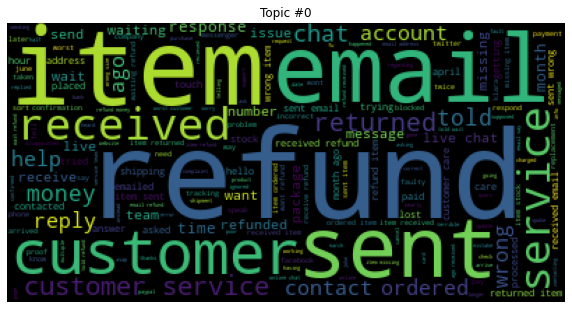

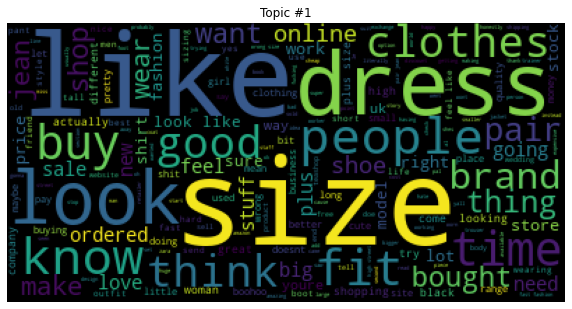

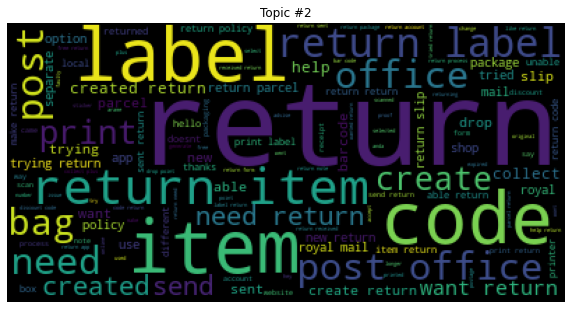

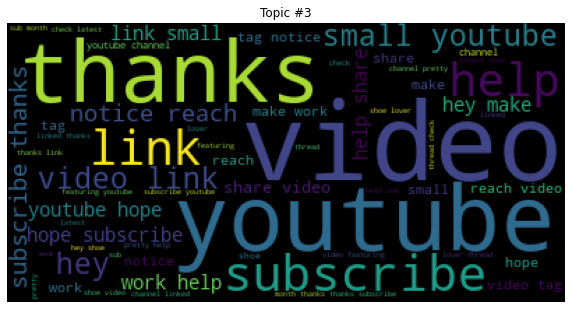

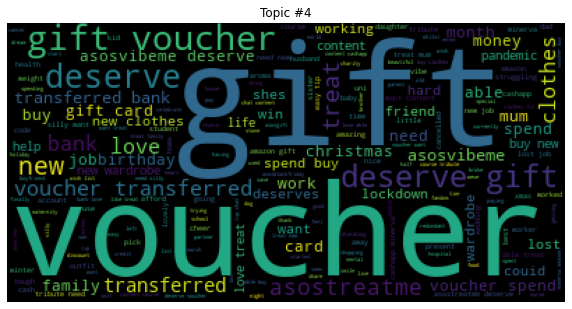

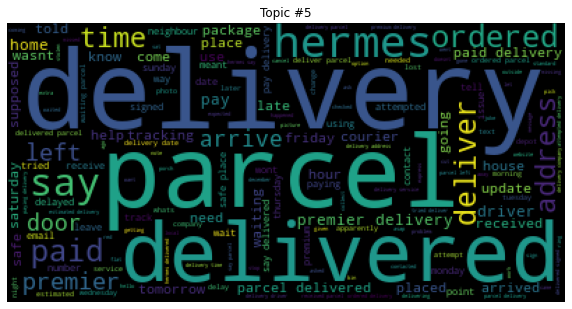

In [51]:
def get_word_freq(topic, model, n_top_words, vocab):
 
    word_dict = {};
    freq = sorted(model.components_[topic])[:-n_top_words - 1: -1]
    words_ids = model.components_[topic].argsort()[:-n_top_words - 1:-1]
    words = [vocab[key] for key in words_ids]
    for i in range(n_top_words):
        word_dict[words[i]] = freq[i]

    
    return word_dict

vocab=tfidf_vect.get_feature_names()

list_of_topics= ['Customer Service', 'Products','Return Service','Video Content','Rewards','Delivery Service']
for topic in range(6):
    plt.figure(figsize = (12,14))
    plt.imshow(WordCloud(background_color='white').fit_words(dict(get_word_freq(topic, nmf_model_6, 200, vocab))))
    plt.axis('off')
    plt.title('Topic: ' + list_of_topics[topic])
    plt.show();
# https://github.com/hiranya33/Metis-Fletcher/blob/master/FletcherLDA-sklearn.ipynb

### Sentiment Analysis

Applying Sentiment Analysis using Flair algorithm to identify and classify the subjective information in tweets content. The information can be an opinion, a judgment or feeling about Asos services and products.

In [52]:
flair_sentiment = flair.models.TextClassifier.load('sentiment-fast')

2021-11-09 23:46:25,874 loading file C:\Users\hp\.flair\models\sentiment-en-mix-ft-rnn_v8.pt


In [53]:
def classify(tweet):
    s = flair.data.Sentence(tweet)
    flair_sentiment.predict(s)
    y=str(s.labels[0]).split()
    label= y[0]
    score = y[1]
    score= float(re.sub('[()]', '', score))
    if score < 0.7:
        label="NEUTRAL"
 
    return label

In [54]:
tweets['sentiment']=tweets['cleaned_tweet'].apply(lambda x:classify(x))

Creating separate dataframe for each sentiment category.

In [56]:
tweets_pos=tweets[tweets['sentiment']=='POSITIVE']
tweets_neg=tweets[tweets['sentiment']=='NEGATIVE']
tweets_neu=tweets[tweets['sentiment']=='NEUTRAL']

In [57]:
print('Number of positive tweets is {}'.format(tweets_pos.shape[0]))
print('Number of negative tweets is {}'.format(tweets_neg.shape[0]))
print('Number of neutral tweets is {}'.format(tweets_neu.shape[0]))

print("Percentage")
total_rows= tweets.shape[0]
print("Positive: ", round(tweets_pos.shape[0]/total_rows,3)*100,"%")
print("Negative: ",  round(tweets_neg.shape[0]/total_rows,3)*100,"%")
print("Neutral: ",  round(tweets_neu.shape[0]/total_rows,3)*100,"%")

Number of positive tweets is 3663
Number of negative tweets is 16802
Number of neutral tweets is 2039
precentage
Positive:  16.3 %
Negative:  74.7 %
Neutral:  9.1 %


In [58]:
tweets.sample(10)

,date,tweet,place,cleaned_tweet,topic,sentiment
7523,2020-12-21,@ASOS A ll the pressies are round the tree S ...,Not specified,all the press are round the tree anta seems to...,Rewards,NEGATIVE
6505,2021-01-29,@ASOS_HeretoHelp Hello .. I requested and put ...,Not specified,hello requested and put wrong address for the ...,Delivery Service,NEGATIVE
22135,2019-11-10,@ASOS i know who's not wearing asos today - ev...,Not specified,know who not wearing as today every sex worker...,Products,NEGATIVE
7049,2021-01-08,Well @ASOS_HeretoHelp @ASOS really did mess u...,Not specified,well really did mess up there order to me late...,Customer Service,NEGATIVE
9943,2020-10-07,"@ASOS_HeretoHelp Hi team, recently moved to Ge...",Not specified,hi team recently moved to germany and ordering...,Products,NEGATIVE
1447,2021-08-12,@ASOS It seems that everyone is having a probl...,Not specified,it seems that everyone is having problem with ...,Products,NEGATIVE
17718,2020-03-29,I worked for the business that runs the ASOS w...,Not specified,worked for the business that run the as wareho...,Products,POSITIVE
19072,2020-02-15,@ASOS_HeretoHelp @ASOS excuse me are you pple...,Not specified,excuse me are you pple oki paid extra for your...,Delivery Service,NEGATIVE
18023,2020-03-21,"@stevejcreasey @ASOS Steve, sorry to hear that...",Not specified,steve sorry to hear that not so much the fish ...,Products,NEGATIVE
11776,2020-08-09,-TB Busan The King press 2019 - - literally ...,Not specified,to busan the king press literally whore for th...,Products,NEUTRAL


# EDA

**Visualizing the number of tweets per topic.**

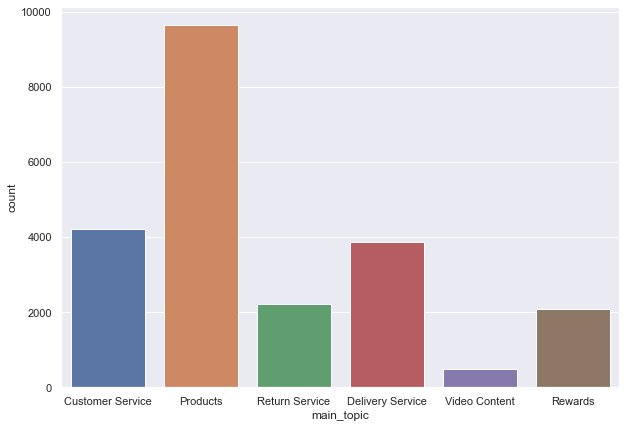

In [59]:
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.countplot(x="main_topic",data=topics_by_tweet)

**Visualize the distribution of sentiment categories in tweets per topic**

In [64]:
tweets_2= tweets.copy(deep=True)

In [65]:
groups= tweets_2.groupby(['topic','sentiment']).size().reset_index(name='counts')

In [66]:
def get_total(topic):
    s= groups[groups['topic']==topic]
    return sum(list(s.counts))

In [69]:
groups['total']=groups['topic'].apply(lambda x:get_total(x))
groups['percent']= groups['counts']/groups['total']

In [70]:
groups

,topic,sentiment,counts,total,precent
0,Customer Service,NEGATIVE,4019,4107,0.978573
1,Customer Service,POSITIVE,88,4107,0.021427
2,Delivery Service,NEGATIVE,3502,3661,0.956569
3,Delivery Service,POSITIVE,159,3661,0.043431
4,Products,NEGATIVE,5960,8358,0.713089
5,Products,POSITIVE,2398,8358,0.286911
6,Return Service,NEGATIVE,2100,2166,0.969529
7,Return Service,POSITIVE,66,2166,0.030471
8,Rewards,NEGATIVE,1023,1782,0.574074
9,Rewards,POSITIVE,759,1782,0.425926


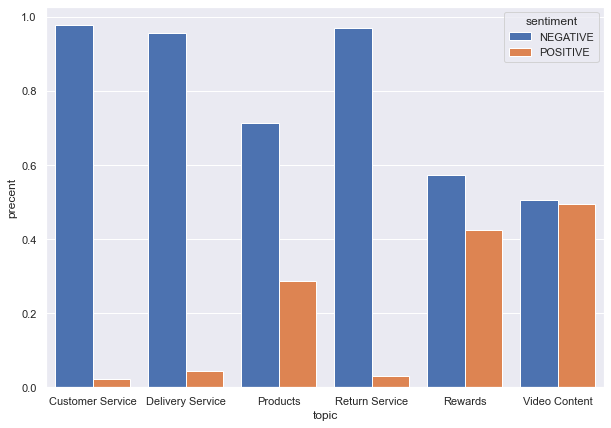

In [84]:
ind = np.arange(len(list(groups['percent'])))
ax.set_yticks(ind)
ax = sns.barplot(x="topic", y="percent", hue="sentiment",data=groups, saturation=1)

**Distribution of delivery complaints over time**

Distribution of delivery complaints over the last two years

In [84]:
negative_delivery_tweets= tweets[tweets['topic']== 'delivery']
negative_delivery_tweets = negative_delivery_tweets[negative_delivery_tweets['sentiment']== 'NEGATIVE']

In [86]:
tweets_neg_time= pd.to_datetime(negative_delivery_tweets['date'], format="%Y-%m-%d")
tweets_neg_time= tweets_neg_time.to_frame()
tweets_neg_time.reset_index(inplace=True, drop=True)

In [12]:
tweets_neg_time= tweets_neg_time.groupby(['date']).size().reset_index(name='counts')
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Distribution of delivery complaints over the last two years")
x = tweets_neg_time['date']
y= tweets_neg_time['counts']
plt.plot(x,y)
plt.show()

NameError: name 'tweets_neg_time' is not defined

In [88]:
tweets_neg_time['year']= tweets_neg_time['date'].dt.year
tweets_neg_time['month']= tweets_neg_time['date'].dt.month
tweets_neg_time['day']= tweets_neg_time['date'].dt.day_name()

In [89]:
tweets_neg_time.head()

,date,counts,year,month,day
0,2019-10-30,5,2019,10,Wednesday
1,2019-10-31,6,2019,10,Thursday
2,2019-11-01,6,2019,11,Friday
3,2019-11-02,11,2019,11,Saturday
4,2019-11-03,8,2019,11,Sunday


Distribution of delivery complaints per month.

In [90]:
tweets_per_month= tweets_neg_time.groupby(['month']).size().reset_index(name='counts')
tweets_per_month.sort_values(by='month', inplace=True)
tweets_per_month['month_name'] = tweets_per_month['month'].apply(lambda x: calendar.month_abbr[x])
tweets_per_month.head(12)

,month,counts,month_name
0,1,57,Jan
1,2,54,Feb
2,3,59,Mar
3,4,50,Apr
4,5,55,May
5,6,58,Jun
6,7,61,Jul
7,8,62,Aug
8,9,58,Sep
9,10,62,Oct


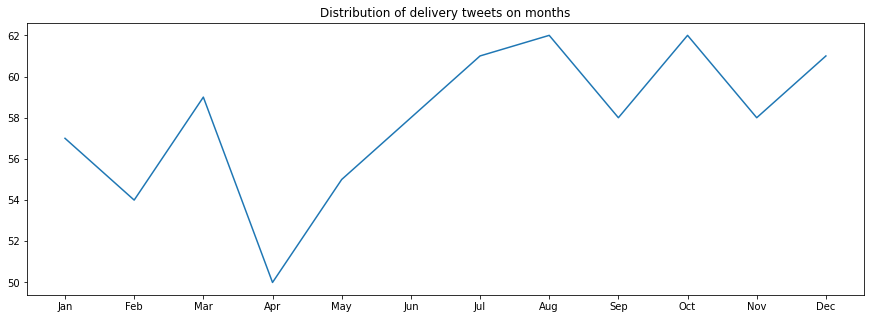

In [91]:
plt.rcParams["figure.figsize"] = (15,5)
plt.title("Distribution of delivery complaints per month")
x = tweets_per_month['month_name']
y = tweets_per_month['counts']

plt.plot(x,y)
plt.show()

Distribution of delivery complaints per month.

In [92]:
tweets_per_day= tweets_neg_time.groupby(['day']).size().reset_index(name='counts')
days = {'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
tweets_per_day['day_num']=tweets_per_day['day'].map(days)
tweets_per_day=tweets_per_day.sort_values(by='day_num')

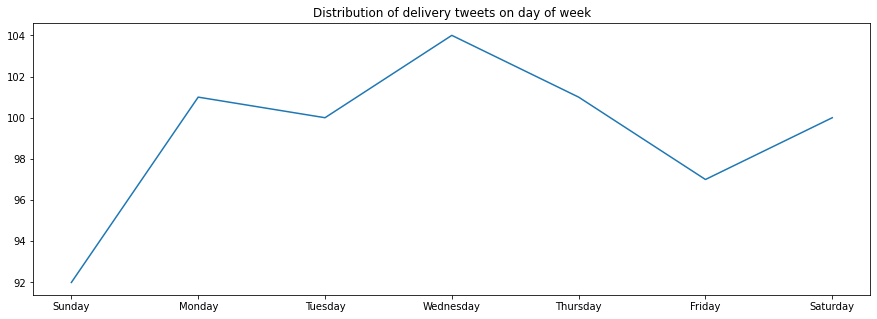

In [93]:
plt.title("Distribution of delivery complaints per day of week")
plt.rcParams["figure.figsize"] = (15,5)
x = tweets_per_day['day']
y =  tweets_per_day['counts']

# plot
plt.plot(x,y)
plt.show()